# Lab-1 

In [1]:
# Lab 1: Базові алгоритми класифікації з використання бібліотеки Scikit-learn

# Виконати наступне: 
#
# 1) Завантажити дані, вивести назви колонок і розмір датасета
# 2) Опрацювати пропуски (по можливості заповнити їх або видалити)
# 3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
# розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)
# 4) Нормалізувати дані
# 5) Провести навчання наступних класифікаторів:
#
# 	kNN
# 	дерево прийняття рішень
# 	SVM
# 	Random Forest
# 	AdaBoost

# Підібрати оптимальні параметри
# 	• для kNN
# 	• для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»

# Серед обраних оптимальних моделей кожного класу вибрати найкращу.

# Відобразити
#
# sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix

# Опис завантажених даних

In [2]:
# <!-- Історія набору даних:

# Інсульт – це медичний стан, при якому поганий кровообіг у мозку викликає загибель клітин. Існує два основних типи інсульту: ішемічний, спричинений недостатністю кровотоку, і геморагічний, спричинений кровотечею. Обидва призводять до того, що частини мозку перестають функціонувати належним чином. Ознаки та симптоми інсульту можуть включати нездатність рухатися або відчувати одну сторону тіла, проблеми з розумінням або розмовою, запаморочення або втрату зору на одну сторону. Ознаки та симптоми часто з’являються незабаром після інсульту. Якщо симптоми тривають менше однієї-двох годин, інсульт є транзиторною ішемічною атакою (ТІА), яку також називають міні-інсультом. Геморагічний інсульт також може супроводжуватися сильним головним болем. Симптоми інсульту можуть бути постійними. Довгострокові ускладнення можуть включати пневмонію та втрату контролю над сечовим міхуром.

# Основним фактором ризику інсульту є високий артеріальний тиск. Інші фактори ризику включають високий рівень холестерину в крові, куріння, ожиріння, цукровий діабет, перенесену в минулому ТІА, термінальну стадію захворювання нирок і фібриляцію передсердь. Ішемічний інсульт зазвичай спричинений закупоркою кровоносної судини, хоча існують і менш поширені причини. Геморагічний інсульт викликається кровотечею безпосередньо в мозок або в простір між оболонками головного мозку. Через розрив аневризми головного мозку може виникнути кровотеча. Діагноз зазвичай базується на фізичному огляді та підтверджується медичними зображеннями, такими як КТ або МРТ. КТ може виключити кровотечу, але не обов’язково виключити ішемію, яка на ранній стадії зазвичай не виявляється на КТ. Інші тести, такі як електрокардіограма (ЕКГ) і аналізи крові, проводяться для визначення факторів ризику та виключення інших можливих причин. Низький рівень цукру в крові може викликати подібні симптоми.

# Профілактика включає зменшення факторів ризику, хірургічне втручання для відкриття артерій до мозку в тих, хто має проблемне звуження сонної артерії, і варфарин у людей з фібриляцією передсердь. Для профілактики лікарі можуть рекомендувати аспірин або статини. Інсульт або ТІА часто потребують невідкладної допомоги. Ішемічний інсульт, якщо його виявлено протягом трьох-чотирьох з половиною годин, можна вилікувати за допомогою ліків, які можуть розщепити тромб. Деякі геморагічні інсульти допомагають від хірургічного втручання. Лікування, спрямоване на відновлення втраченої функції, називається реабілітацією після інсульту та в ідеалі проводиться в інсультному відділенні; однак вони недоступні в більшості країн світу.

# Інформація про атрибути
# 1) стать: «Чоловік», «Жінка» або «Інше»
# 2) вік: вік пацієнта
# 3) гіпертонія: 0, якщо у пацієнта немає гіпертонії, 1, якщо у пацієнта гіпертонія
# 4) захворювання серця: 0, якщо у пацієнта немає захворювань серця, 1 якщо у пацієнта є захворювання серця 5) був коли-небудь одружений: «Ні» або «Так»
# 6) тип роботи: «діти», «Державний», «Ніколи не працював», «Приватний» або «самозайнятий» 7) Тип проживання: «Сільський» або «Міський»
# 8) середній рівень глюкози: середній рівень глюкози в крові
# 9) ІМТ: індекс маси тіла
# 10) статус_куріння: «раніше курив», «ніколи не курив», «курить» або "Невідомо"*
# 11) штрих:1, якщо у пацієнта був інсульт, або 0, якщо ні

# *Примітка: «Невідомо» в smoking_status означає, що інформація для цього пацієнта недоступна -->

# Посилання на dataset

In [3]:
# <!-- Brain Stroke Dataset:
# https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset -->

# Code

In [4]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


DATA_PATH = 'archive/brain_stroke.csv'

dataset = pd.read_csv(DATA_PATH)
temp_detaset=copy.deepcopy(dataset)
display(dataset)

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Rural             174.12  24.0     never smoked       1  
4             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

In [5]:
display(dataset.info())
display(dataset.describe())
dataset.isnull().sum()

# list(dataset.columns.values.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


None

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
gender_type_labels = dataset['gender'].unique()
ever_married_type_labels = dataset['ever_married'].unique()
work_type_labels = dataset['work_type'].unique()
resident_type_labels = dataset['Residence_type'].unique()
smoking_status_labels = dataset['smoking_status'].unique()

print('Gender type values:', gender_type_labels)
print('Ever married type values:', ever_married_type_labels)
print('Work type values:', work_type_labels)
print('Residence type values:', resident_type_labels)
print('Smoking status values:', smoking_status_labels)

Gender type values: ['Male' 'Female']
Ever married type values: ['Yes' 'No']
Work type values: ['Private' 'Self-employed' 'Govt_job' 'children']
Residence type values: ['Urban' 'Rural']
Smoking status values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [7]:
dataset['gender'] = dataset['gender'].map({'Female':1,'Male':0})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['work_type'] = dataset['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})
dataset['Residence_type'] = dataset['Residence_type'].map({'Urban': 1, 'Rural':0})
dataset['smoking_status'] = dataset['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

dataset.head()


gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          0   
1       0  80.0             0              1             1          0   
2       1  49.0             0              0             1          0   
3       1  79.0             1              0             1          1   
4       0  81.0             0              0             1          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               0       1  
1               0             105.92  32.5               1       1  
2               1             171.23  34.4               2       1  
3               0             174.12  24.0               1       1  
4               1             186.21  29.0               0       1

# Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

gender       age  hypertension  heart_disease  \
gender             1.000000  0.026538     -0.021485      -0.086476   
age                0.026538  1.000000      0.278120       0.264852   
hypertension      -0.021485  0.278120      1.000000       0.111974   
heart_disease     -0.086476  0.264852      0.111974       1.000000   
ever_married       0.028971  0.677137      0.164534       0.114765   
work_type         -0.063684 -0.406469     -0.073155      -0.056632   
Residence_type     0.004301  0.017155     -0.004755       0.002125   
avg_glucose_level -0.055796  0.236763      0.170028       0.166847   
bmi                0.012093  0.373703      0.158762       0.060926   
smoking_status    -0.039050 -0.377088     -0.127008      -0.064861   
stroke            -0.008870  0.246478      0.131965       0.134610   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
gender                 0.028971  -0.063684        0.004301          -0.055796   
age                    0.677137  -0.406469        0.017155           0.236763   
hypertension           0.164534  -0.073155       -0.004755           0.170028   
heart_disease          0.114765  -0.056632        0.002125           0.166847   
ever_married           1.000000  -0.365538        0.008191           0.150724   
work_type             -0.365538   1.000000        0.008475          -0.069794   
Residence_type         0.008191   0.008475        1.000000           0.001346   
avg_glucose_level      0.150724  -0.069794        0.001346           1.000000   
bmi                    0.371690  -0.369027        0.013185           0.186348   
smoking_status        -0.306390   0.312169        0.003405          -0.097531   
stroke                 0.108398  -0.056713        0.016494           0.133227   

                        bmi  smoking_status    stroke  
gender             0.012093       -0.039050 -0.008870  
age                0.373703       -0.377088  0.246478  
hypertension       0.158762       -0.127008  0.131965  
heart_disease      0.060926       -0.064861  0.134610  
ever_married       0.371690       -0.306390  0.108398  
work_type         -0.369027        0.312169 -0.056713  
Residence_type     0.013185        0.003405  0.016494  
avg_glucose_level  0.186348       -0.097531  0.133227  
bmi                1.000000       -0.255127  0.056926  
smoking_status    -0.255127        1.000000 -0.066612  
stroke             0.056926       -0.066612  1.000000

<AxesSubplot:>

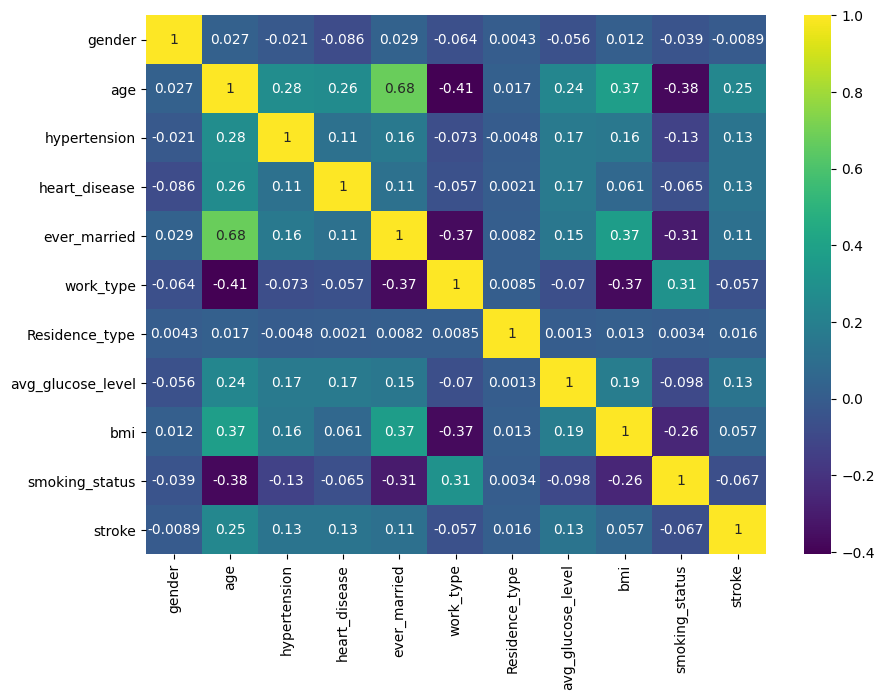

In [8]:
display(dataset.corr())
plt.figure(figsize = (10, 7))
sns.heatmap(dataset.corr(), cmap='viridis',annot=True)

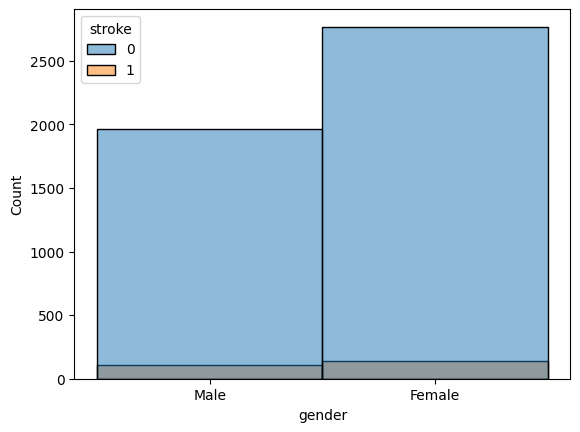

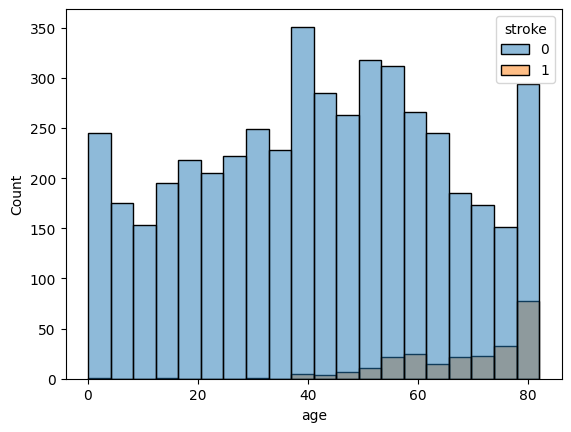

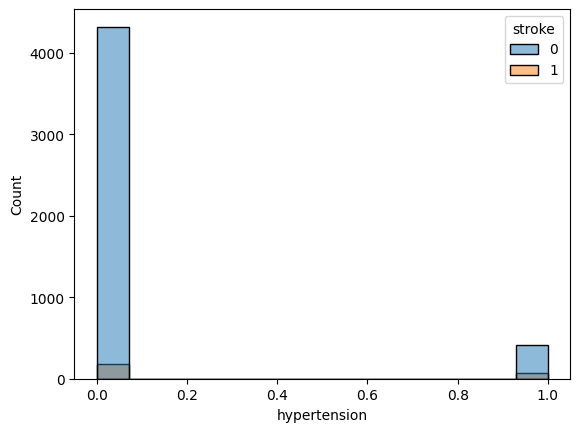

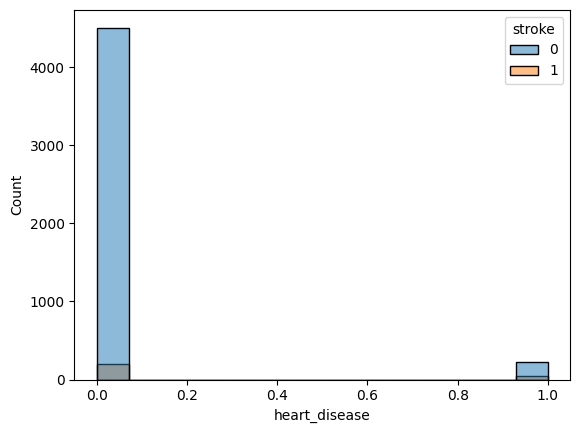

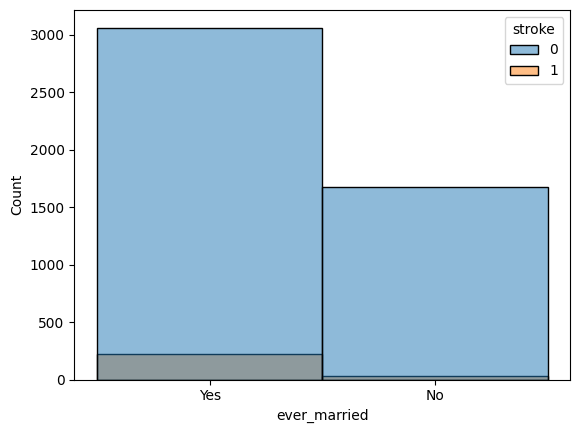

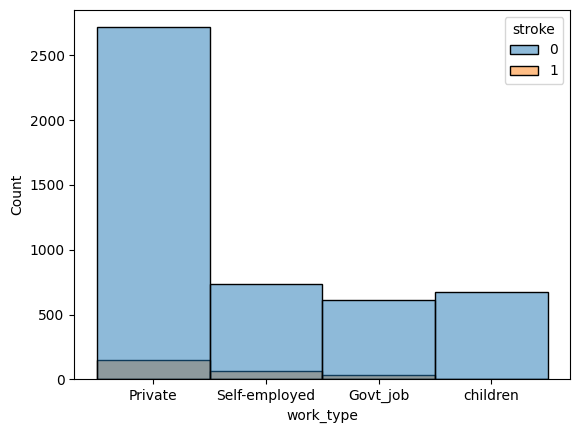

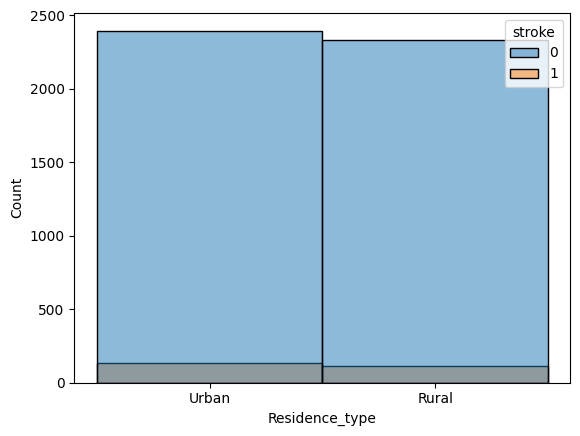

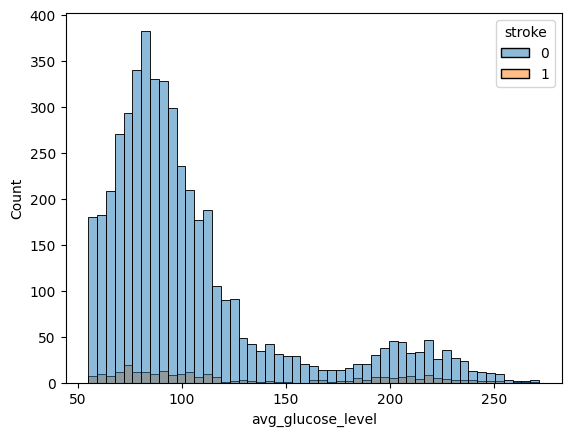

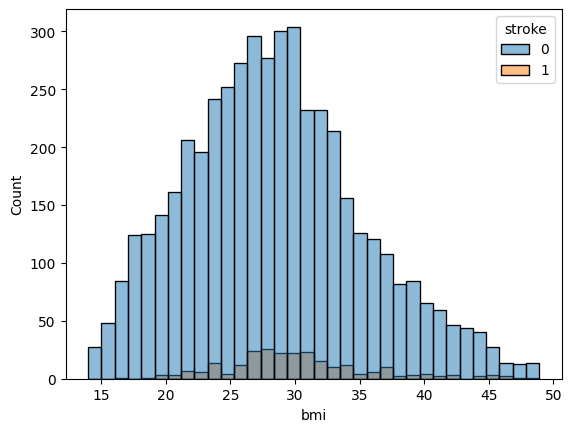

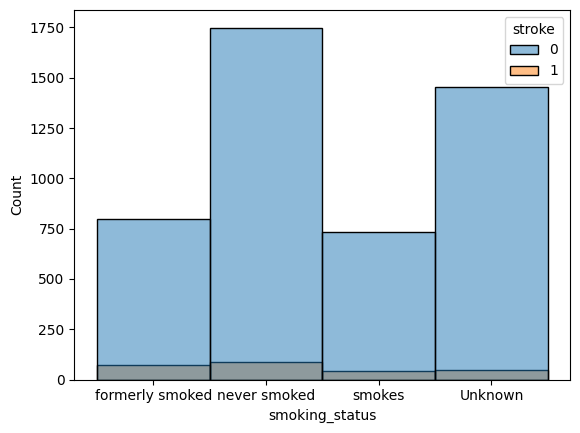

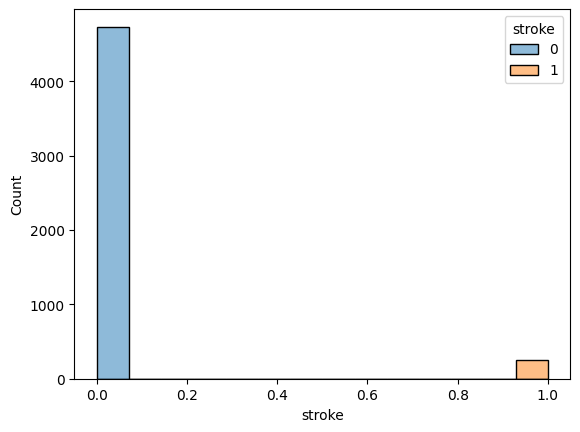

In [9]:
for i in temp_detaset.columns:
    sns.histplot(data=temp_detaset, x = i,hue = 'stroke')
    plt.show()

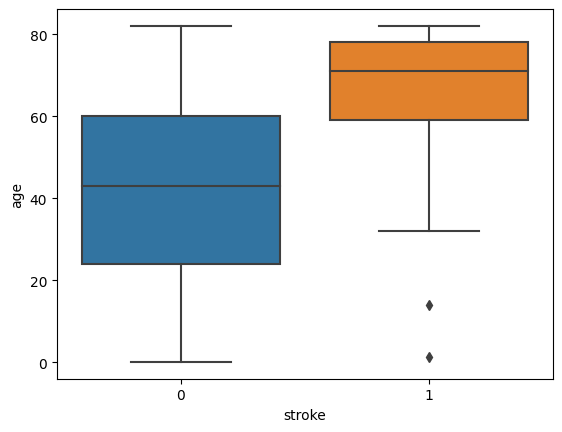

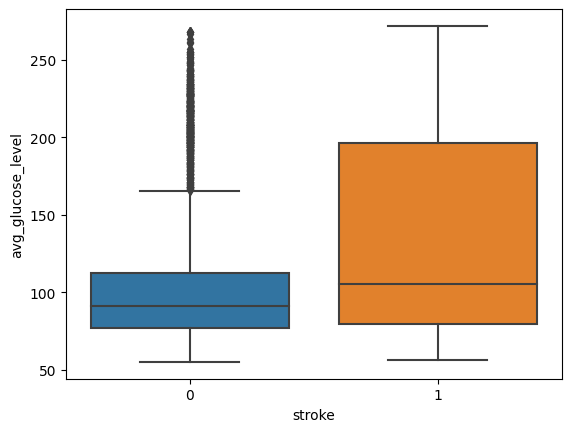

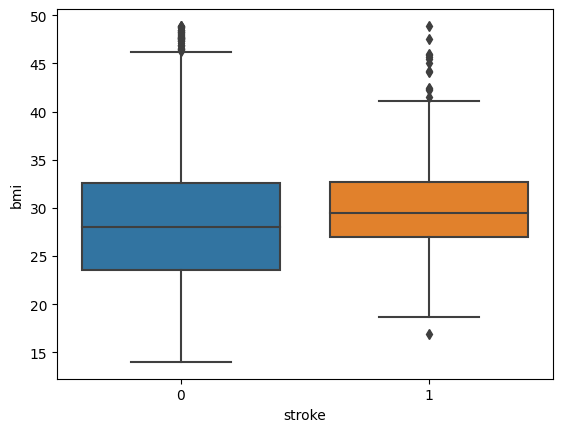

In [10]:
for i in dataset.columns:
    if i == 'stroke' or i == 'gender' or i == 'heart deases' or i=='hypertension' or i=='heart_disease' or i=='ever_married' or i=='Residence_type' or i=='smoking_status' or i=='work_type':
        continue
    else:
        plt.figure()
        sns.boxplot(y=dataset[str(i)],x=dataset['stroke'])

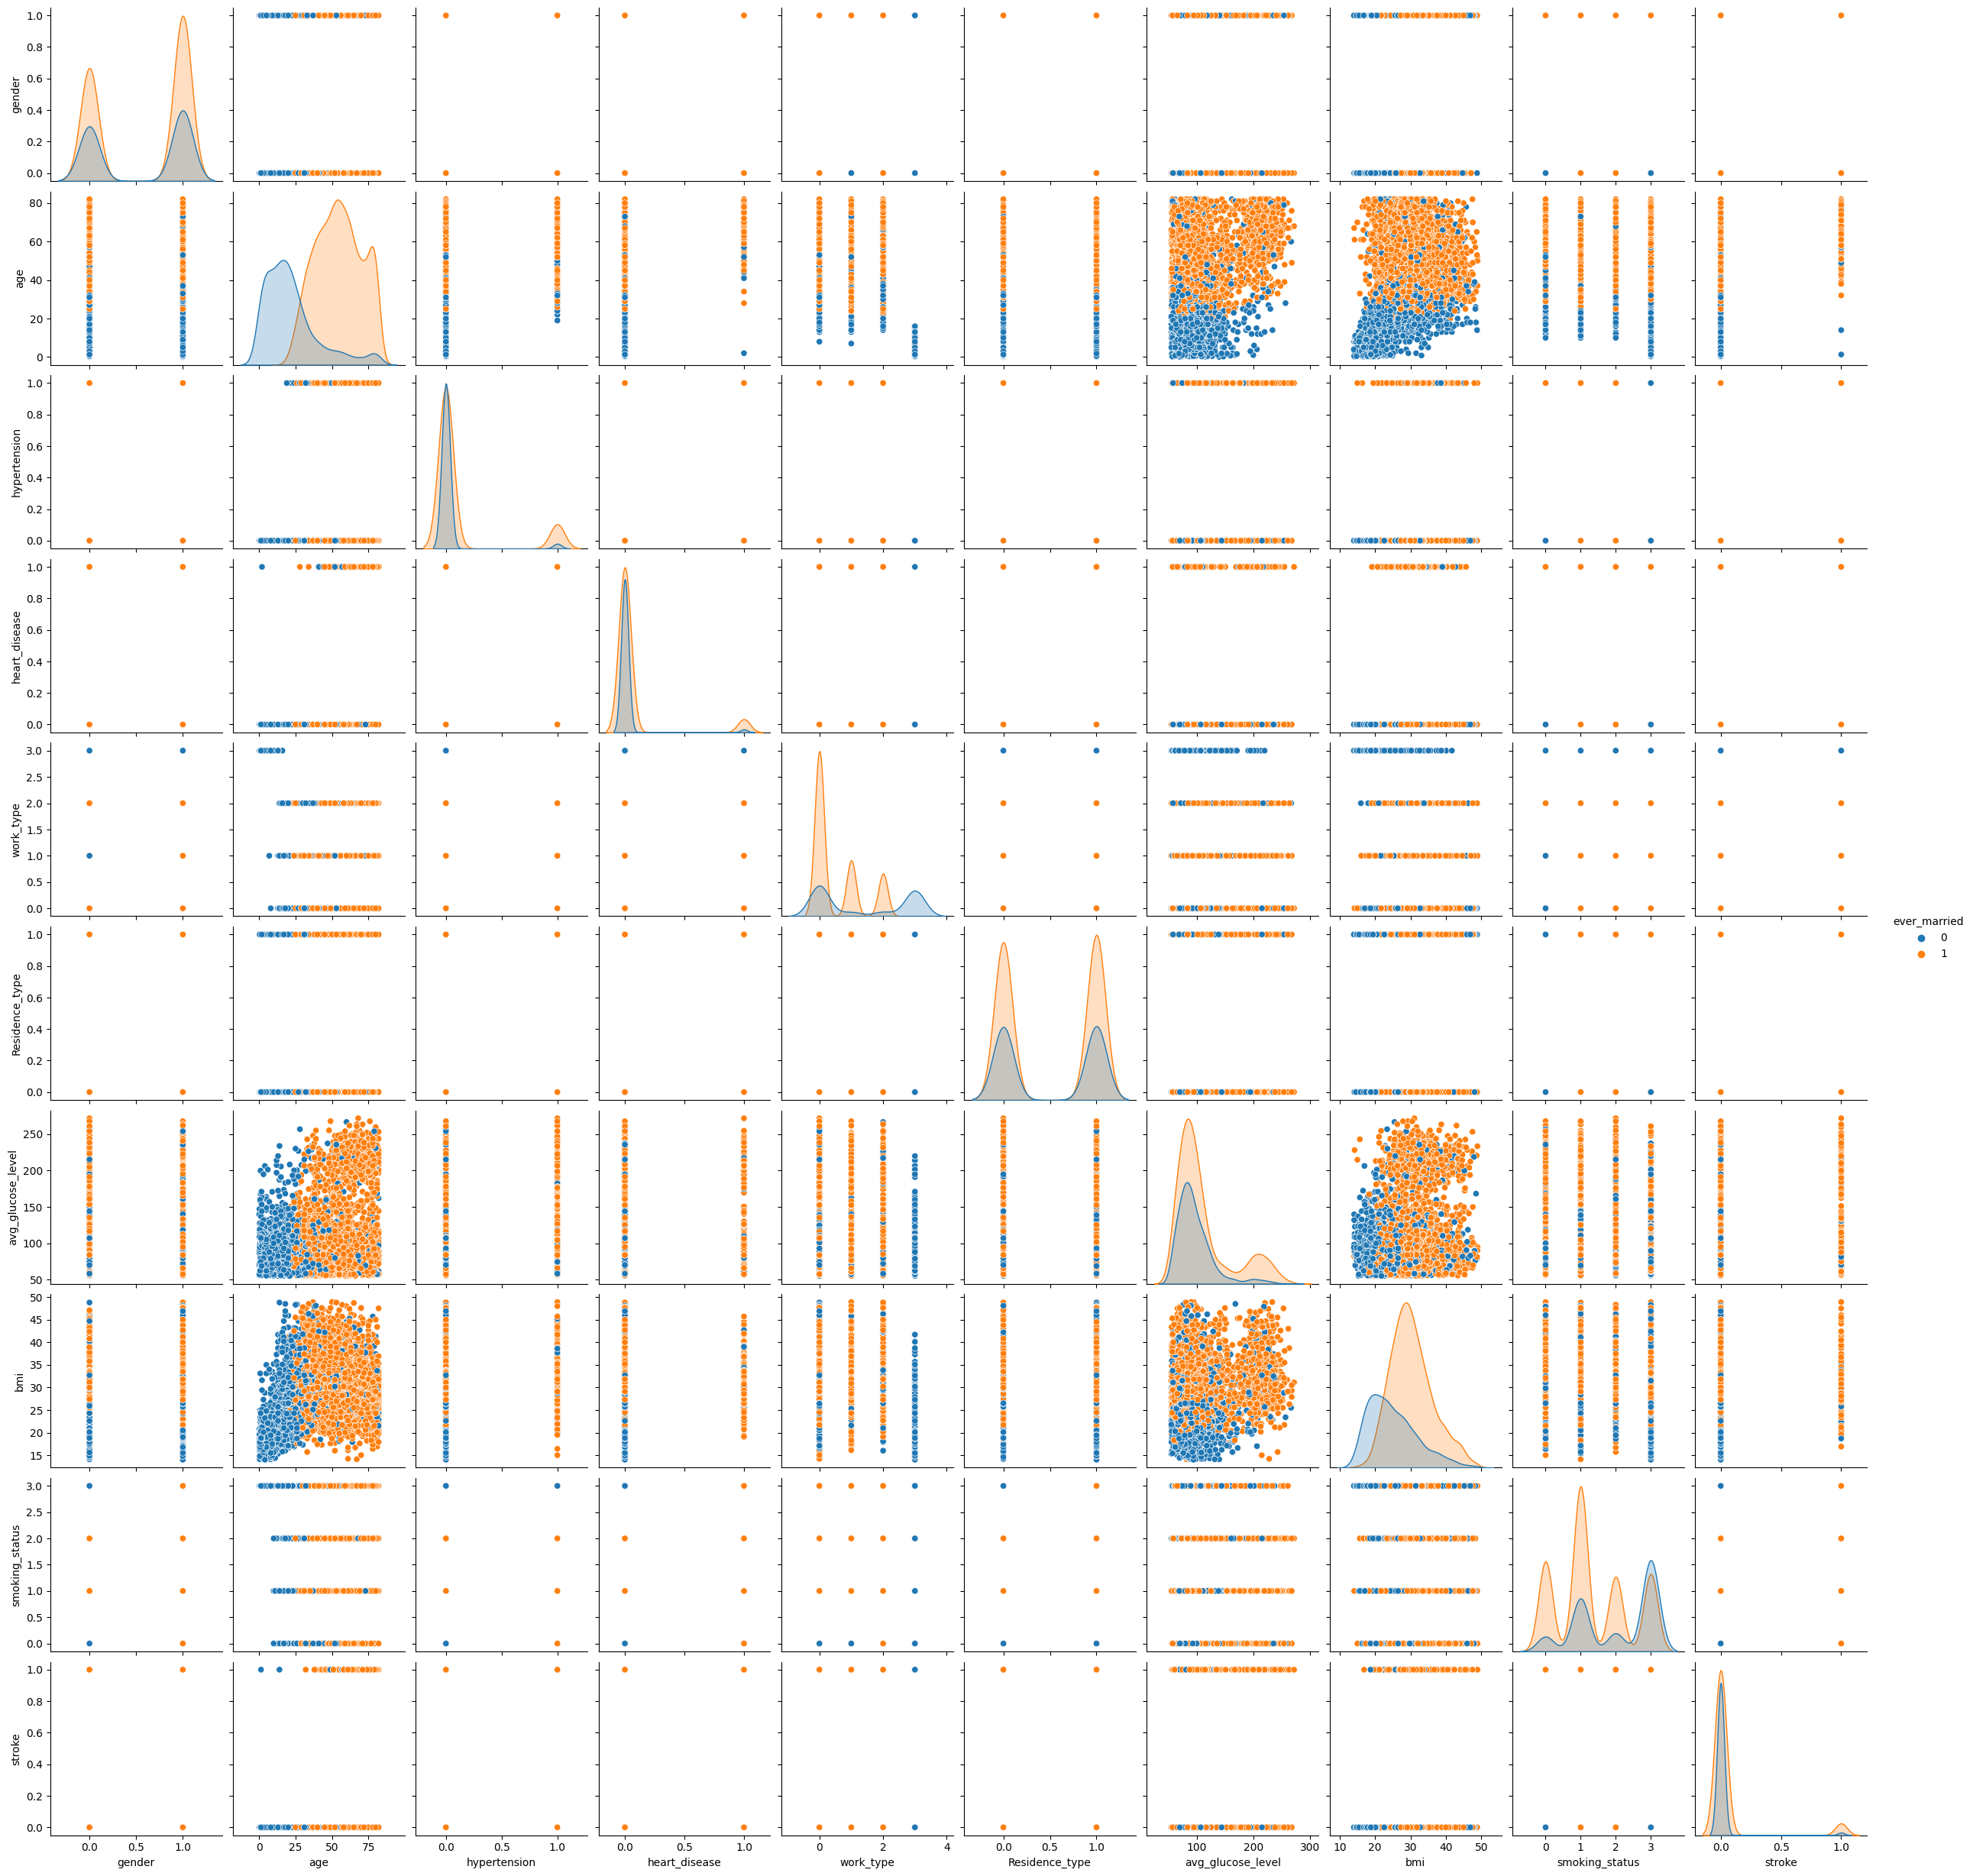

In [11]:
sns.pairplot(data = dataset, hue = 'ever_married')


In [12]:
# Ми можемо побачити тут:

# - Жінки частіше страждають від інсульту
# - Одружені люди частіше хворіють на інсульт
# - У категорії Private work_type є більша ймовірність інсульту
# - Категорія «ніколи не курив» ​​має більшу ймовірність інсульту, також категорія, яка не має гіпертонії та серцевих захворювань, має більшу ймовірність інсульту
# - Люди старше 40 років частіше страждають від інсульту
# - Високий рівень ІМТ може призвести до інсульту
# - Люди з низьким рівнем глюкози частіше страждають від інсульту

# Нормалізовані дані

In [13]:
normal_dataset = copy.deepcopy(dataset.iloc[:, :-1])
normal_dataset.reset_index()
normalizer = preprocessing.MinMaxScaler()
normal_dataset = normalizer.fit_transform(normal_dataset.to_numpy())
normal_dataset = pd.DataFrame (normal_dataset, columns = ["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status"])
normal_dataset['stroke']=dataset['stroke']
display(normal_dataset)


gender       age  hypertension  heart_disease  ever_married  work_type  \
0        0.0  0.816895           0.0            1.0           1.0   0.000000   
1        0.0  0.975586           0.0            1.0           1.0   0.000000   
2        1.0  0.597168           0.0            0.0           1.0   0.000000   
3        1.0  0.963379           1.0            0.0           1.0   0.333333   
4        0.0  0.987793           0.0            0.0           1.0   0.000000   
...      ...       ...           ...            ...           ...        ...   
4976     0.0  0.499512           0.0            0.0           0.0   0.000000   
4977     0.0  0.487305           0.0            0.0           1.0   0.000000   
4978     1.0  0.548340           1.0            0.0           1.0   0.666667   
4979     0.0  0.487305           0.0            0.0           1.0   0.000000   
4980     1.0  0.975586           1.0            0.0           1.0   0.000000   

      Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0                1.0           0.801265  0.647564        0.000000       1  
1                0.0           0.234512  0.530086        0.333333       1  
2                1.0           0.536008  0.584527        0.666667       1  
3                0.0           0.549349  0.286533        0.333333       1  
4                1.0           0.605161  0.429799        0.000000       1  
...              ...                ...       ...             ...     ...  
4976             0.0           0.069384  0.452722        0.000000       0  
4977             1.0           0.627966  0.489971        0.666667       0  
4978             0.0           0.184194  0.510029        0.666667       0  
4979             0.0           0.133044  0.458453        0.666667       0  
4980             1.0           0.132167  0.432665        0.333333       0  

[4981 rows x 11 columns]

# K Nearest Neighbors

In [14]:
X = normal_dataset.drop(['stroke'], axis = 1)
y = normal_dataset['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,random_state=5, stratify = normal_dataset['stroke'])

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 


In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)


KNeighborsClassifier()

In [17]:
y_pred = knn.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred))

[[2355   12]
 [ 121    3]]


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2367
           1       0.20      0.02      0.04       124

    accuracy                           0.95      2491
   macro avg       0.58      0.51      0.51      2491
weighted avg       0.91      0.95      0.93      2491



In [19]:
print(accuracy_score(y_test,y_pred))

0.9466077880369329


In [20]:
normal_dataset['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [21]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

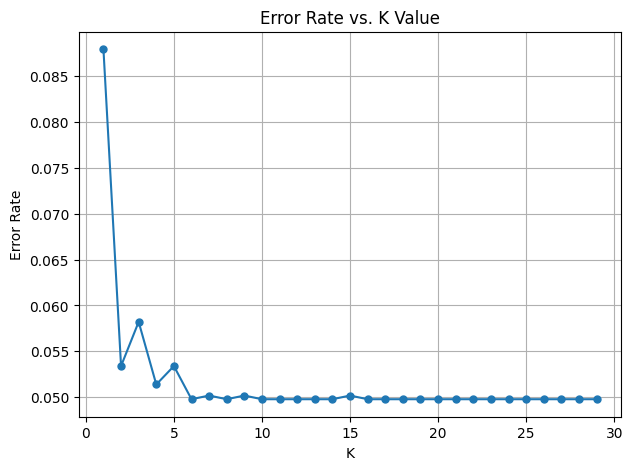

In [22]:
plt.figure(figsize=(7,5))
plt.plot(range(1,30), error_rate, marker='o', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))


[[2343   24]
 [ 121    3]]


In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2367
           1       0.11      0.02      0.04       124

    accuracy                           0.94      2491
   macro avg       0.53      0.51      0.50      2491
weighted avg       0.91      0.94      0.92      2491



# Decision Tree 

In [25]:
X = normal_dataset.drop(['stroke'], axis = 1)
y = normal_dataset['stroke']

In [26]:
set(y)
print(type(X), type(y))
print(X.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(4981, 10) (4981,)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=101,stratify = normal_dataset['stroke'])

In [28]:
print(type(X), type(y))
print(X_train.shape, y_train.shape)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(3984, 10) (3984,)


In [29]:
model = DecisionTreeClassifier() #criterion='gini'

In [30]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       947
           1       0.10      0.12      0.11        50

    accuracy                           0.90       997
   macro avg       0.53      0.53      0.53       997
weighted avg       0.91      0.90      0.91       997



In [34]:
print(confusion_matrix(y_test, y_pred))

[[894  53]
 [ 44   6]]


<Figure size 1500x1500 with 0 Axes>

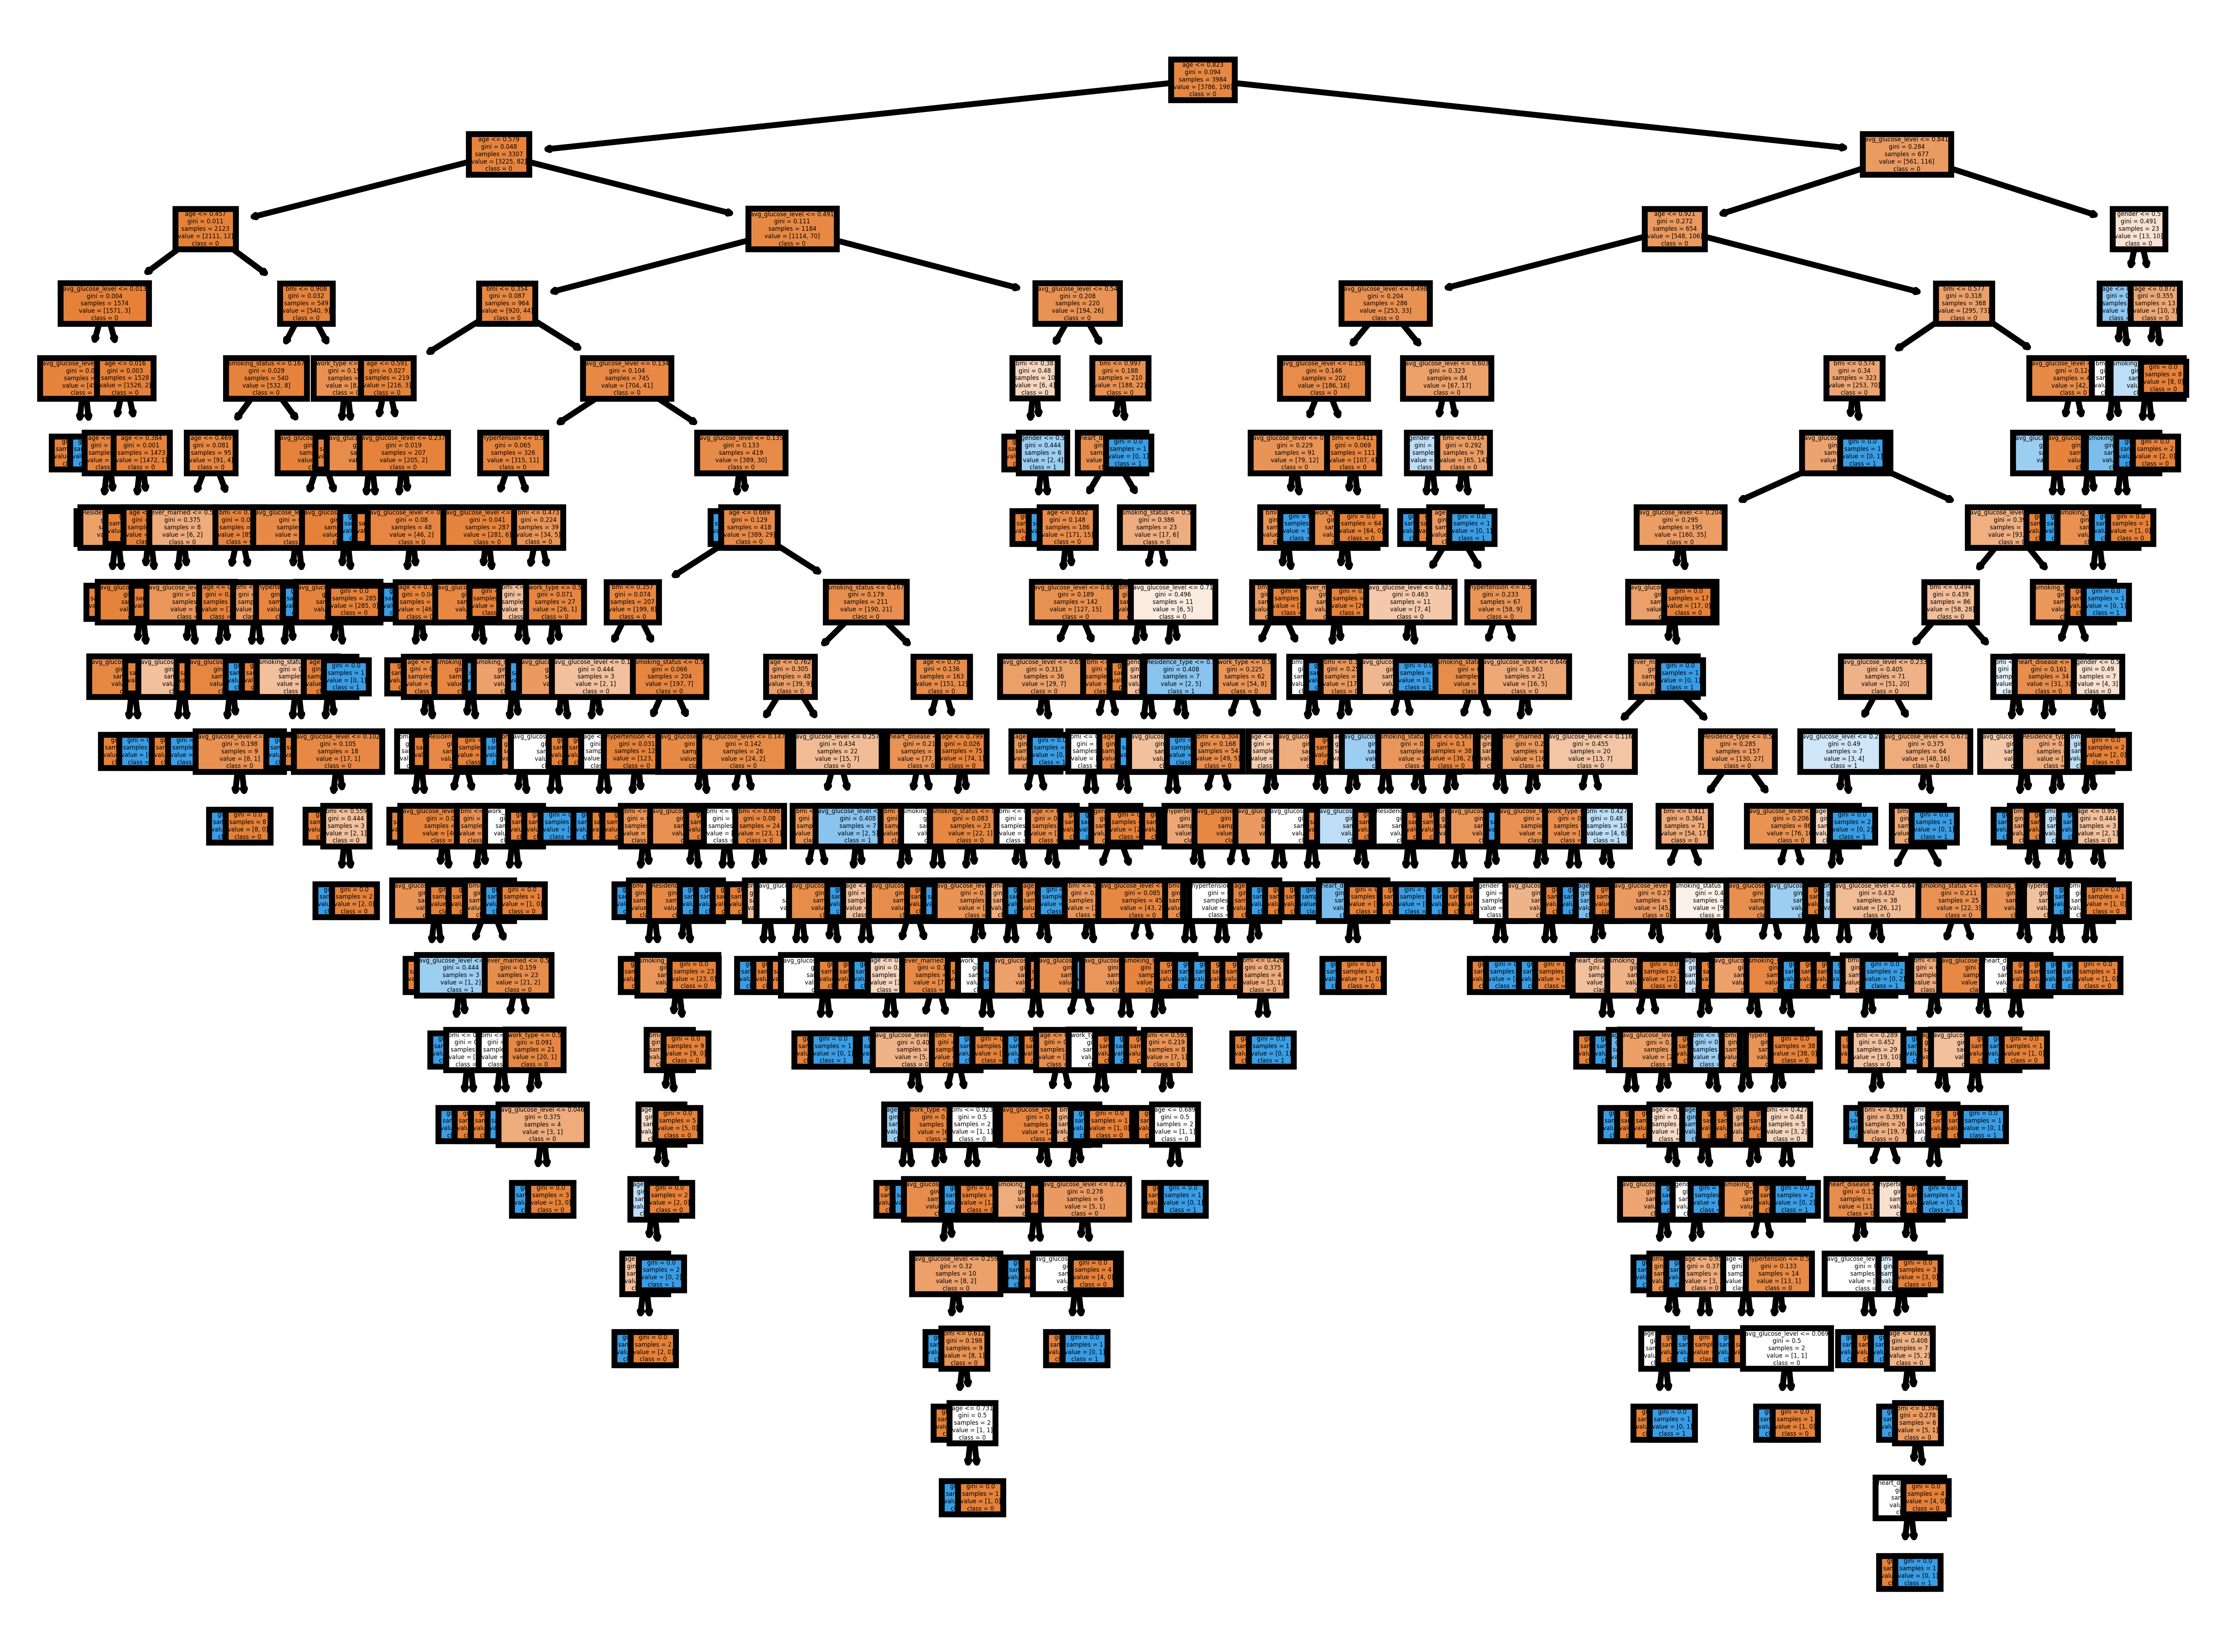

In [35]:
plt.figure(figsize = (15, 15))
plt.figure(dpi=1200)
plot_tree(model, feature_names = ['gender',	'age',	'hypertension',	'heart_disease',	'ever_married',	'work_type',	'Residence_type',	'avg_glucose_level',	'bmi',	'smoking_status'], 
          class_names = [str(0),str(1)], filled = True)
plt.show()

# Support Vector Machine

In [36]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [37]:
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset['stroke'], test_size=0.30, random_state=101)

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [39]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')

In [40]:
model.fit(scaled_X_train,y_train)

SVC(gamma=1.0)

In [41]:
y_pred = model.predict(scaled_X_test)

In [42]:
print(confusion_matrix(y_test, y_pred))

[[1405    0]
 [  64   26]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1405
           1       1.00      0.29      0.45        90

    accuracy                           0.96      1495
   macro avg       0.98      0.64      0.71      1495
weighted avg       0.96      0.96      0.95      1495



In [44]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear','rbf']} 

In [45]:
grid = GridSearchCV(SVC(), param_grid, refit=True)

In [46]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [47]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [48]:
grid.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear')

In [49]:
grid_predictions = grid.predict(scaled_X_test)

In [50]:
print(confusion_matrix(y_test,grid_predictions))

[[1405    0]
 [   0   90]]


In [51]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1405
           1       1.00      1.00      1.00        90

    accuracy                           1.00      1495
   macro avg       1.00      1.00      1.00      1495
weighted avg       1.00      1.00      1.00      1495



# 	Random Forest

In [76]:
# https://hands-on.cloud/implementation-of-random-forest-algorithm-using-python/
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import delayed
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X = normal_dataset.drop(['stroke'], axis = 1)
y = normal_dataset['stroke']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,  random_state=0, stratify=y)

In [77]:
# Importing standardScaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [78]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
classifier = RandomForestClassifier()

# fit the model
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
y_pred = classifier.predict(X_test)


In [80]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.9488465396188566


In [81]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred_test = forest.predict(X_test)

In [82]:
accuracy_score(y_test, y_pred_test)

0.9478435305917753

In [83]:
confusion_matrix(y_test, y_pred_test)

array([[945,   2],
       [ 50,   0]])

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.92       997



# 	AdaBoost

In [87]:
# https://www.datacamp.com/tutorial/adaboost-classifier-python
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [88]:
X = normal_dataset.drop(['stroke'], axis = 1)
y = normal_dataset['stroke']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101, stratify=y) 

In [90]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)


In [91]:
model = abc.fit(X_train, y_train)

In [92]:
y_pred = model.predict(X_test)

In [93]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))




Accuracy: 0.9471571906354515


In [95]:
confusion_matrix(y_test, y_pred)

array([[1414,    7],
       [  72,    2]])

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.22      0.03      0.05        74

    accuracy                           0.95      1495
   macro avg       0.59      0.51      0.51      1495
weighted avg       0.92      0.95      0.93      1495

